Initial Grid:
Iteration 1:


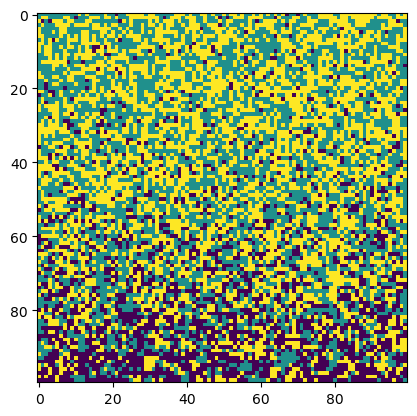

Iteration 2:


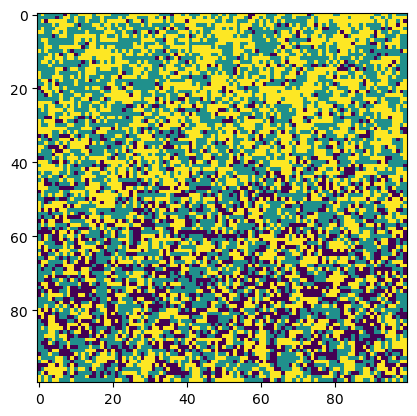

Iteration 3:


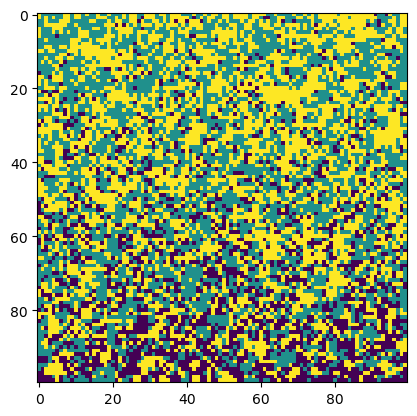

Iteration 4:


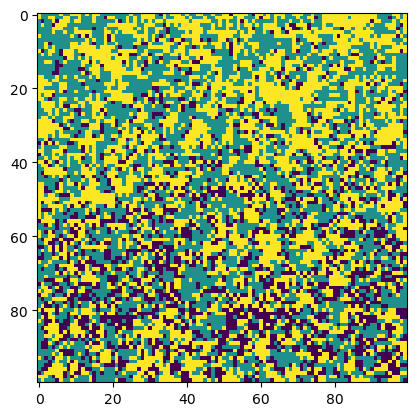

Iteration 5:


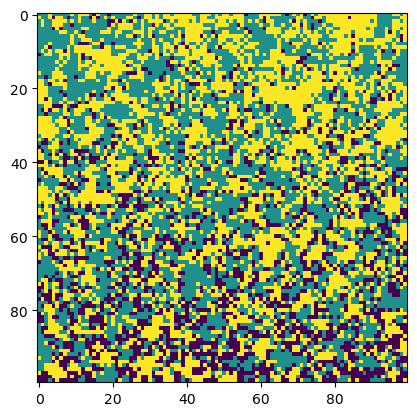

Iteration 6:


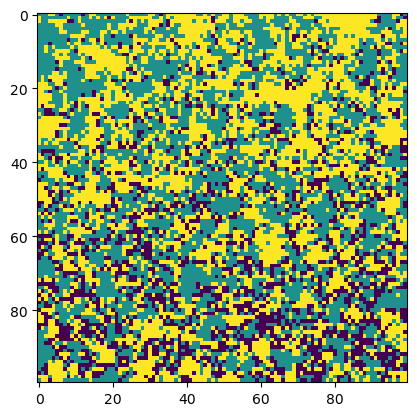

Iteration 7:


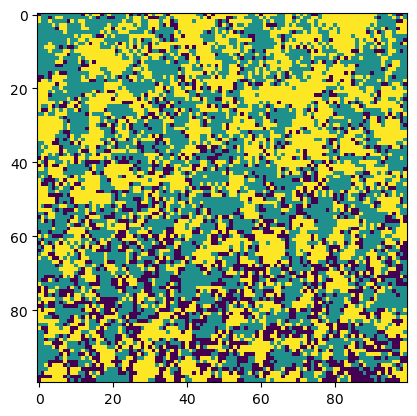

Iteration 8:


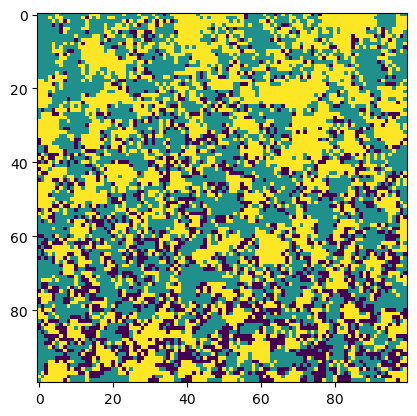

Iteration 9:


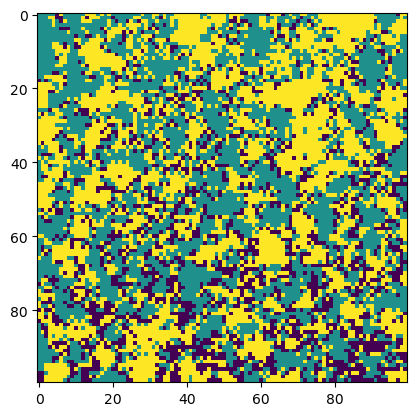

Iteration 10:


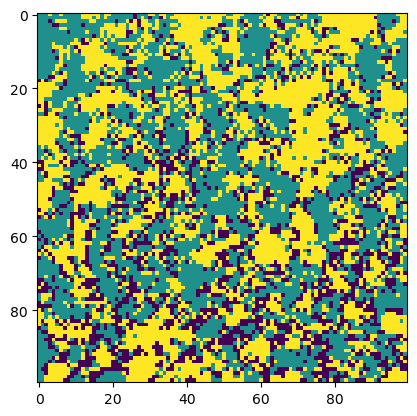

Iteration 11:


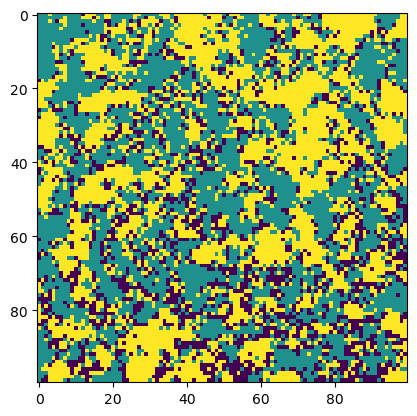

Iteration 12:


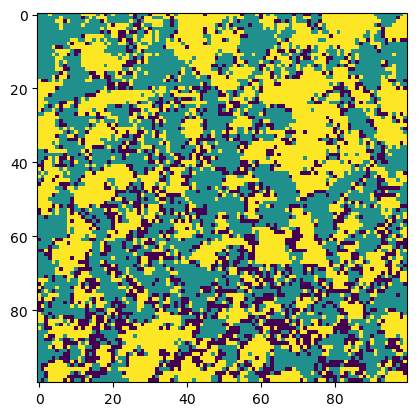

Iteration 13:


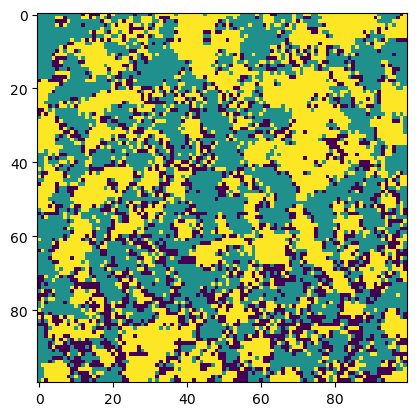

Iteration 14:


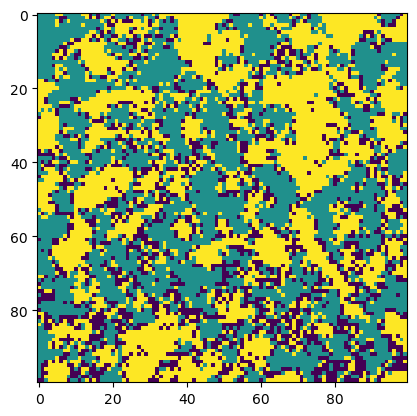

Iteration 15:


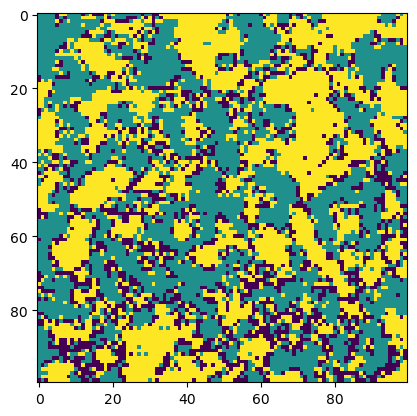

Iteration 16:


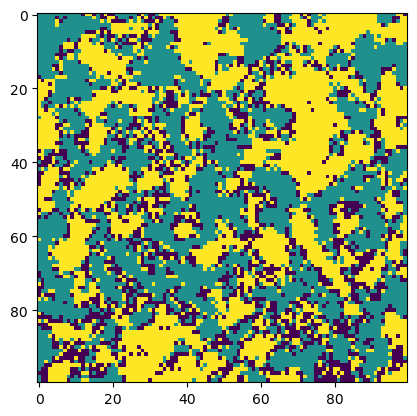

Iteration 17:


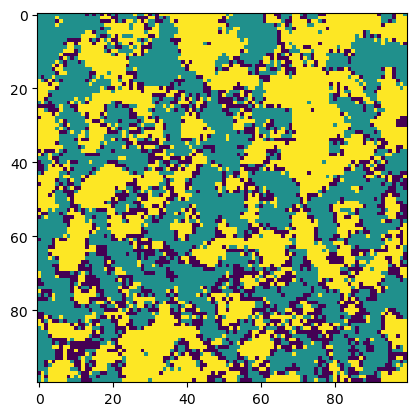

Iteration 18:


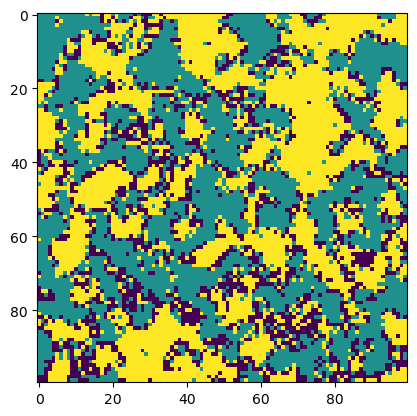

Iteration 19:


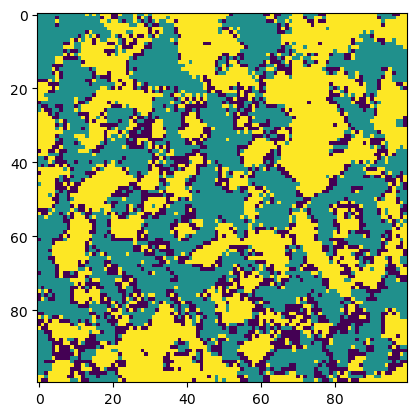

Iteration 20:


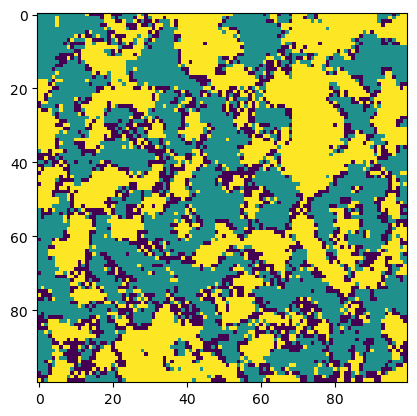

In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def create_grid(size, empty_ratio, group_ratio):
    """Create the initial grid with two groups and empty spaces."""
    grid = []
    total_cells = size * size
    group1_count = int(total_cells * group_ratio / 2)
    group2_count = int(total_cells * group_ratio / 2)
    empty_count = total_cells - group1_count - group2_count

    cells = ['A'] * group1_count + ['B'] * group2_count + [''] * empty_count
    random.shuffle(cells)

    for i in range(size):
        grid.append(cells[i * size:(i + 1) * size])
    return grid

def display_grid(grid):
    """Display the grid."""
    # for row in grid:
    #     print(' '.join(cell if cell else '.' for cell in row))
    # print()
    vis = []
    for row in grid:
        vis.append([['', 'A', 'B'].index(cell) for cell in row])
    plt.imshow(vis)
    return vis



def is_unsatisfied(x, y, grid, threshold):
    """Check if a resident at (x, y) is unsatisfied."""
    size = len(grid)
    current = grid[x][y]
    if current == '':
        return False

    neighbors = []
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue
            nx, ny = x + dx, y + dy
            if 0 <= nx < size and 0 <= ny < size:
                neighbors.append(grid[nx][ny])

    same_group_count = neighbors.count(current)
    total_neighbors = len([n for n in neighbors if n])
    return total_neighbors > 0 and (same_group_count / total_neighbors) < threshold

def find_empty_cell(grid):
    """Find a random empty cell."""
    empty_cells = [(x, y) for x in range(len(grid)) for y in range(len(grid[x])) if grid[x][y] == '']
    return empty_cells

def move_unsatisfied(grid, threshold):
    """Move unsatisfied residents to empty cells."""
    size = len(grid)
    unsatisfied = []
    for x in range(size):
        for y in range(size):
            if grid[x][y] and is_unsatisfied(x, y, grid, threshold):
                unsatisfied.append((x, y))

    empty_cells = find_empty_cell(grid)
    for x, y in unsatisfied:
        ex, ey = random.choice(empty_cells)
        empty_cells.remove((ex, ey))
        empty_cells.append((x, y))
        grid[ex][ey], grid[x][y] = grid[x][y], ''

def schelling_simulation(size, empty_ratio, group_ratio, threshold, iterations):
    """Run Schelling's segregation simulation."""
    grid = create_grid(size, empty_ratio, group_ratio)
    print("Initial Grid:")
    history = [display_grid(grid)]

    plt.ion()
    for i in range(iterations):
        print(f"Iteration {i + 1}:")
        move_unsatisfied(grid, threshold)

        history.append(display_grid(grid))
        plt.pause(0.1)
    plt.ioff()
    plt.show()
    return history

# Parameters
size = 100  # Grid size (10x10)
empty_ratio = 0.2  # Percentage of empty spaces
group_ratio = 0.8  # Percentage of cells occupied by residents
threshold = 0.7  # Similarity threshold for satisfaction
iterations = 20  # Number of iterations

history = schelling_simulation(size, empty_ratio, group_ratio, threshold, iterations)


In [2]:
def frame(i):
    ax.clear()
    ax.set_title(f"Iteration {i}")
    ax.imshow(history[i])

fig, ax = plt.subplots(figsize=(8,6))

animation = FuncAnimation(fig, frame, interval=100, frames=len(history))
HTML(animation.to_jshtml())

